In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#Required models for modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
np.random.seed(42)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
customerdata = pd.read_excel("../DS Project1/marketing_campaign.xlsx")
print("Number of datapoints:", len(customerdata))
customerdata

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
customerdata.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Cleaning

In [4]:
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

##### From the above output, we can conclude and note that:

##### There are missing values in income
##### Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
##### There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

In [5]:
# Replace missing values of income feild with Income Mean Values
# Calculate the mean of the 'Income' column
income_mean = customerdata['Income'].mean().round(decimals=0)
income_mean

52247.0

In [6]:
# Replace missing values with the mean
customerdata['Income'].fillna(income_mean, inplace=True)

##### Create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, taking this value relative to the most recent customer in the record. Thus to get the values I must check the newest and oldest recorded dates.

In [7]:
# Customer's time being enrolled
customerdata['Dt_Customer'] = pd.to_datetime(customerdata.Dt_Customer)
customerdata['Date_Collected'] = '01-01-2015'
customerdata['Date_Collected'] = pd.to_datetime(customerdata.Date_Collected)
customerdata['Time_Enrolled_Days'] = (customerdata['Date_Collected'] - customerdata['Dt_Customer']).dt.days

In [8]:
print("Total categories in the feature Marital_Status:\n", customerdata["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", customerdata["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


##### Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
##### Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
##### Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
##### Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
##### To get further clarity of household, Creating feature indicating "Family_Size"
##### Create a feature "Is_Parent" to indicate parenthood status
##### Lastly, I will create three categories in the "Education" by simplifying its value counts.
##### Dropping some of the redundant features

# Feature Engineering

In [9]:
#Age of customer today 
customerdata["Age"] = 2024-customerdata["Year_Birth"]

#Total spendings on various items
customerdata["Spent"] = customerdata["MntWines"]+ customerdata["MntFruits"]+ customerdata["MntMeatProducts"]+ customerdata["MntFishProducts"]+ customerdata["MntSweetProducts"]+ customerdata["MntGoldProds"]

#Deriving living situation by marital status"Alone"
customerdata["Living_With"]=customerdata["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
customerdata["Children"]=customerdata["Kidhome"]+customerdata["Teenhome"]

#Feature for total members in the householde
customerdata["Family_Size"] = customerdata["Living_With"].replace({"Alone": 1, "Partner":2})+ customerdata["Children"]

#Feature pertaining parenthood
customerdata["Is_Parent"] = np.where(customerdata.Children> 0, 1, 0)

#Segmenting education levels in three groups
customerdata["Education"]=customerdata["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
customerdata=customerdata.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [10]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","Date_Collected"]
customerdata = customerdata.drop(to_drop, axis=1)

In [11]:
# Descriptive Statistics
customerdata.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.248661     0.444196     0.506250    49.109375   303.935714   
std     25037.797168     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51741.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.064286      0.013393     0.009375     0.149107   
std        0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000     1.000000     1.000000   

       Time_Enrolled_Days          Age        Spent     Children  Family_Size  \
count         2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean           539.582143    55.194196   605.798214     0.950446     2.595089   
std            202.122512    11.984069   602.249288     0.751803     0.906959   
min            186.000000    28.000000     5.000000     0.000000     1.000000   
25%            366.750000    47.000000    68.750000     0.000000     2.000000   
50%            541.500000    54.000000   396.000000     1.000000     3.000000   
75%            715.000000    65.000000  1045.500000     1.000000     3.000000   
max            885.000000   131.000000  2525.000000     3.000000     5.000000   

         Is_Parent  
count  2240.000000  
mean      0.715179  
std       0.451430  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 28 columns]

##### The above stats show some discrepancies in mean Income and Age and max Income and age.

##### Do note that max-age is 131 years, As I calculated the age that would be today (i.e. 2024) and the data is old.

##### It clearly says there are outliers in Income and age, taking only those data points which falls under 3 standard deviation.

Text(0.5, 1.0, 'Income chart of customers')

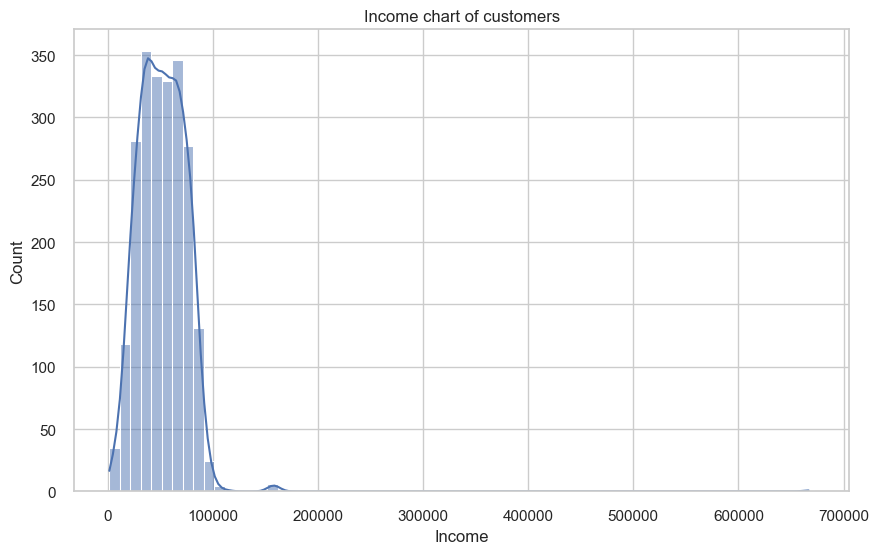

In [12]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
ax = sns.histplot(data=customerdata, x='Income', binwidth=10000, kde=True)
ax.set_title('Income chart of customers')

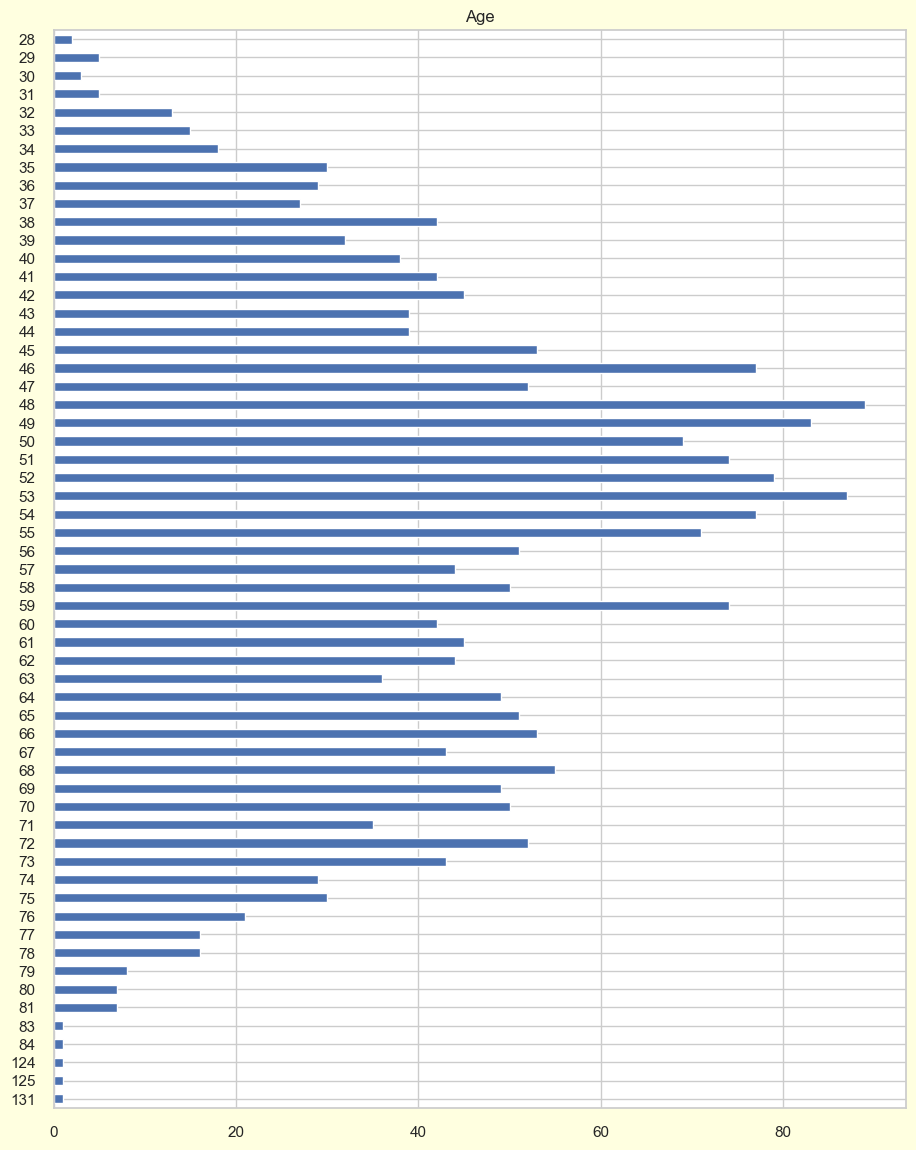

In [13]:
plt.figure(figsize=(11,14), facecolor='lightyellow')
customerdata['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

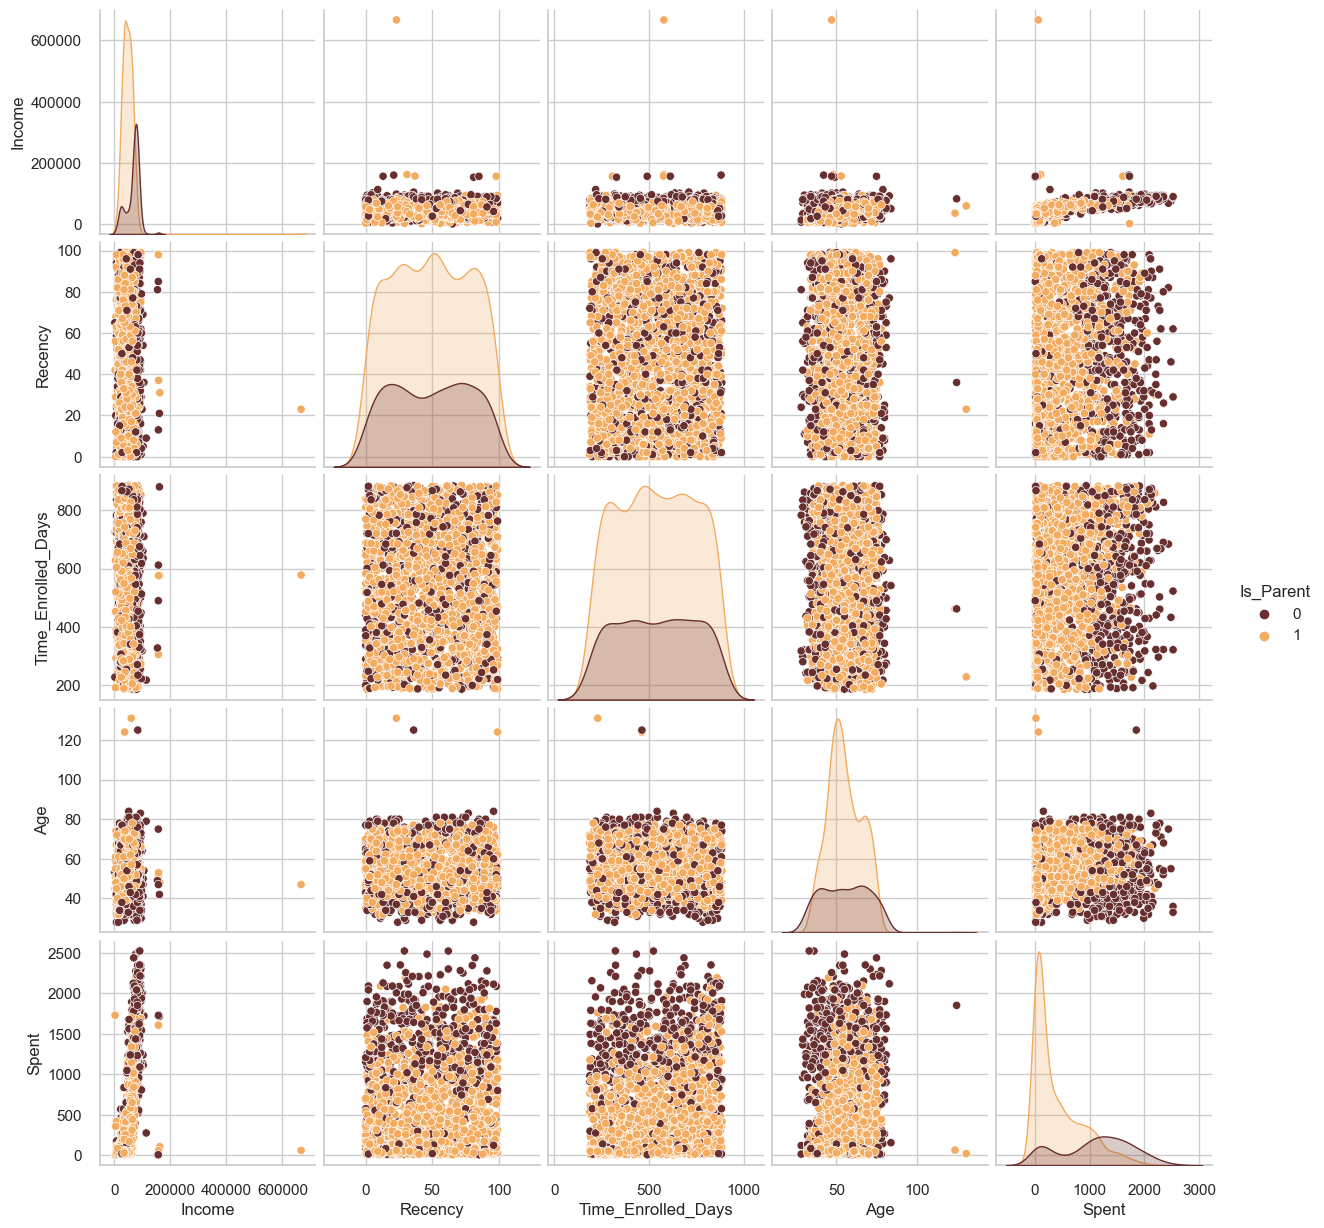

In [14]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Time_Enrolled_Days", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(customerdata[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

##### There are a few outliers in the Income and Age features.Deleting the outliers in the customer data.

In [15]:
# Removing outliers in income
from scipy import stats
# Remove observation with more than 3 in Z score
customerdata = customerdata[(np.abs(stats.zscore(customerdata['Income'])) < 3)]     

# Reset index
customerdata.reset_index(inplace=True)                          

customerdata = customerdata.drop(columns=['index'])

In [16]:
customerdata.shape

(2232, 30)

<Axes: >

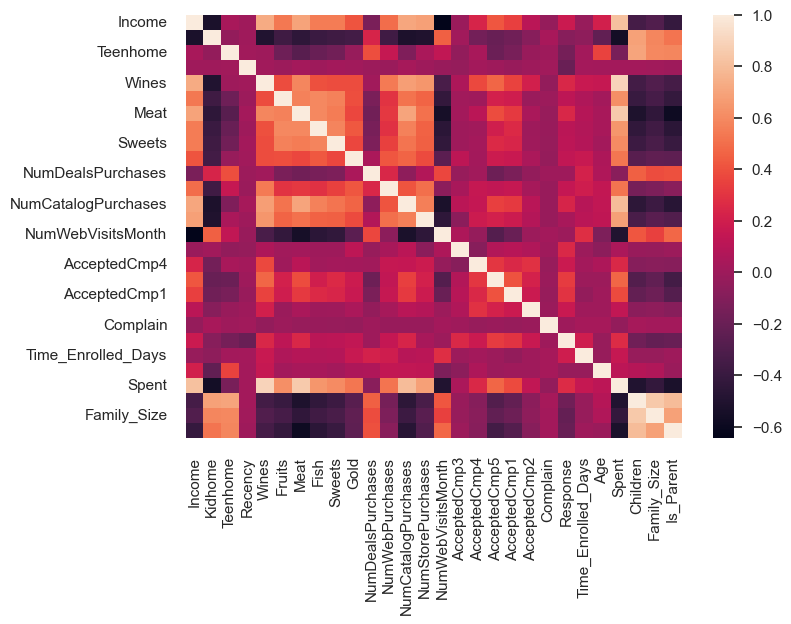

In [17]:
sns.heatmap(customerdata.corr())

# Data preprocessing

In [18]:
#Get list of categorical variables
s = (customerdata.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [19]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    customerdata[i]=customerdata[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [20]:
customerdata.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response  Time_Enrolled_Days  Age  \
0      88  ...             0         0         1                 849   67   
1       1  ...             0         0         0                 299   70   
2      21  ...             0         0         0                 498   59   
3       3  ...             0         0         0                 325   40   
4      27  ...             0         0         0                 347   43   

   Spent  Living_With  Children  Family_Size  Is_Parent  
0   1617            0         0            1          0  
1     27            0         2            3          1  
2    776            1         0            2          0  
3     53            1         1            3          1  
4    422            1         1            3          1  

[5 rows x 30 columns]

In [21]:
data_final = customerdata.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(data_final)
scaled_ds = pd.DataFrame(scaler.transform(data_final),columns= data_final.columns )
X_scaled = scaler.fit_transform(data_final)
print("All features are now scaled")

All features are now scaled


In [22]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.894106  0.315469 -0.825420 -0.931339  0.307081  0.980281  1.547741   
1  -0.894106 -0.257134  1.031775  0.905012 -0.383851 -0.872949 -0.637496   
2  -0.894106  0.969686 -0.825420 -0.931339 -0.798410  0.359568  0.568152   
3  -0.894106 -1.213480  1.031775 -0.931339 -0.798410 -0.872949 -0.562143   
4   0.567905  0.322995  1.031775 -0.931339  1.550759 -0.391822  0.417446   

       Meat      Fish    Sweets  ...  AcceptedCmp2  Complain  Response  \
0  1.735476  2.457243  1.472657  ...     -0.116722 -0.097458  2.383828   
1 -0.726318 -0.651911 -0.633057  ...     -0.116722 -0.097458 -0.419493   
2 -0.174694  1.341605 -0.148984  ...     -0.116722 -0.097458 -0.419493   
3 -0.662493 -0.505598 -0.584649  ...     -0.116722 -0.097458 -0.419493   
4 -0.215724  0.152811 -0.003763  ...     -0.116722 -0.097458 -0.419493   

   Time_Enrolled_Days       Age     Spent  Living_With  Children  Family_Size  \
0            1.530417  0.983726  1.682002    -1.344451 -1.266161    -1.759248   
1           -1.189828  1.233983 -0.962227    -1.344451  1.394923     0.446111   
2           -0.205594  0.316372  0.283388     0.743798 -1.266161    -0.656569   
3           -1.061234 -1.268592 -0.918988     0.743798  0.064381     0.446111   
4           -0.952424 -1.018334 -0.305328     0.743798  0.064381     0.446111   

   Is_Parent  
0  -1.587610  
1   0.629878  
2  -1.587610  
3   0.629878  
4   0.629878  

[5 rows x 30 columns]

# PCA

In [131]:
pca = PCA(n_components=3)

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Transform the data to its principal components
X_pca = pca.transform(X_scaled)

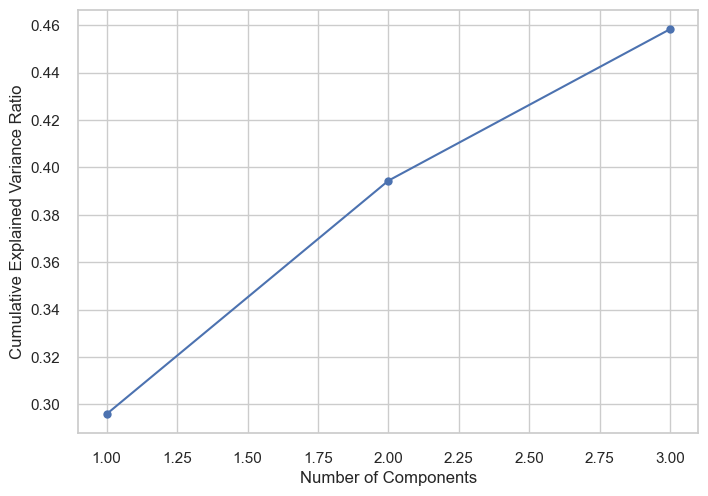

In [132]:
import matplotlib.pyplot as plt

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Perform Clustering

### Elbow Method to determine the number of clusters to be formed
### Model evaluation using Silhouette score

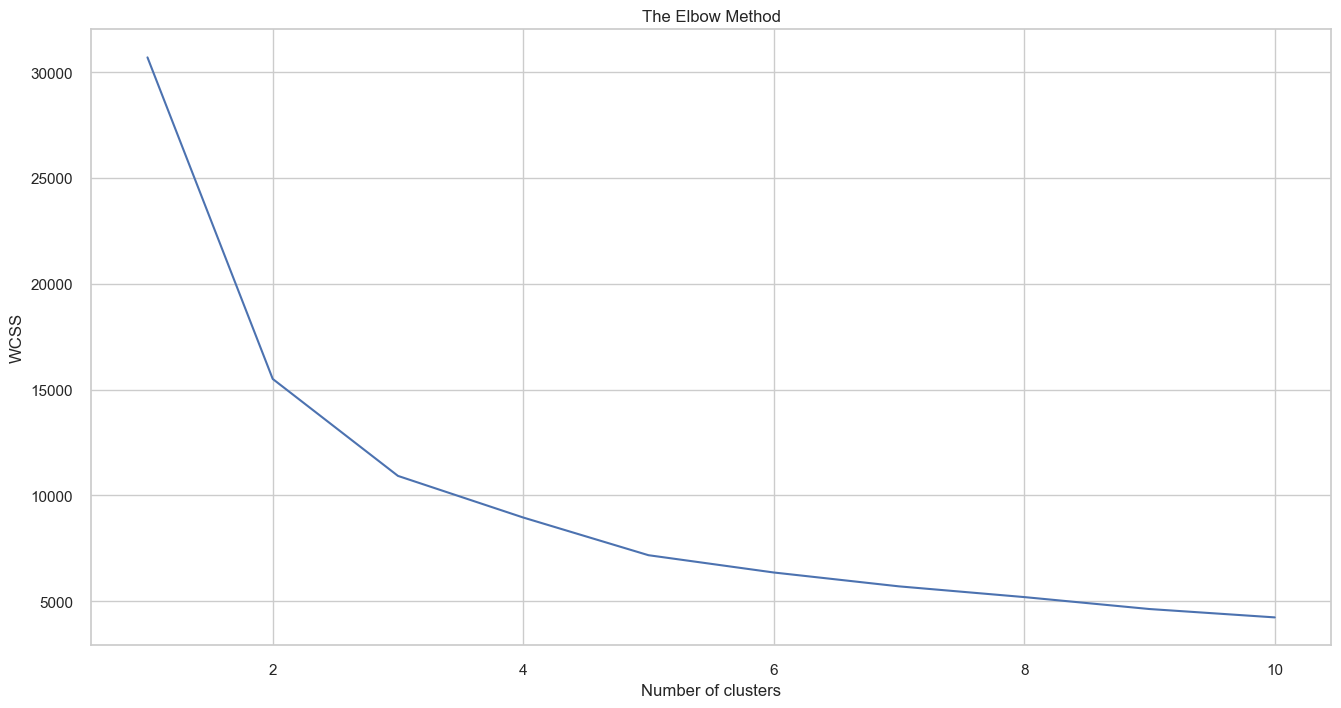

In [133]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(X_pca)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From above graph we can choose number of clusters as 4. Lets see for silhouette score for more details.

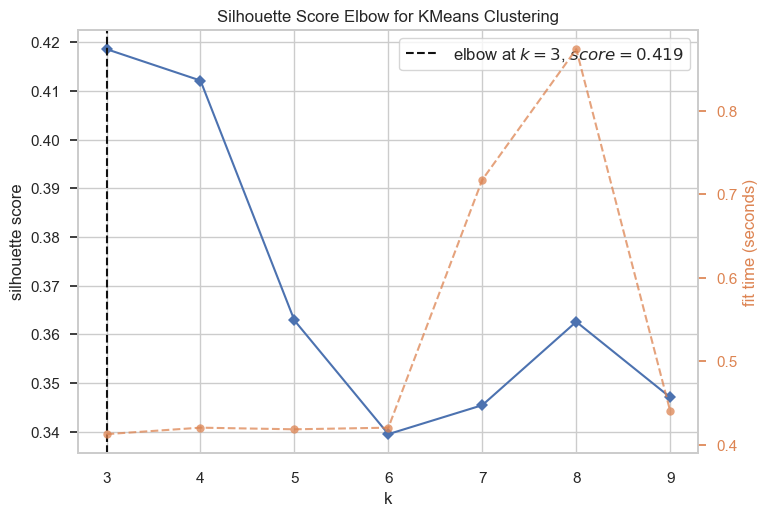

In [134]:
Elbow_M = KElbowVisualizer(KMeans(), k=(3,10), metric='silhouette')
Elbow_M.fit(X_pca)
Elbow_M.show();

The cluster: 2 average silhouette score is: 0.45851515865598685
The cluster: 3 average silhouette score is: 0.41468571936702914
The cluster: 4 average silhouette score is: 0.3359487281970514
The cluster: 5 average silhouette score is: 0.31578380859246297
The cluster: 6 average silhouette score is: 0.30506688149485495
The cluster: 7 average silhouette score is: 0.29908789284466475
The cluster: 8 average silhouette score is: 0.2788359360826083
The cluster: 9 average silhouette score is: 0.27817528550547826
The cluster: 10 average silhouette score is: 0.25788200838393016


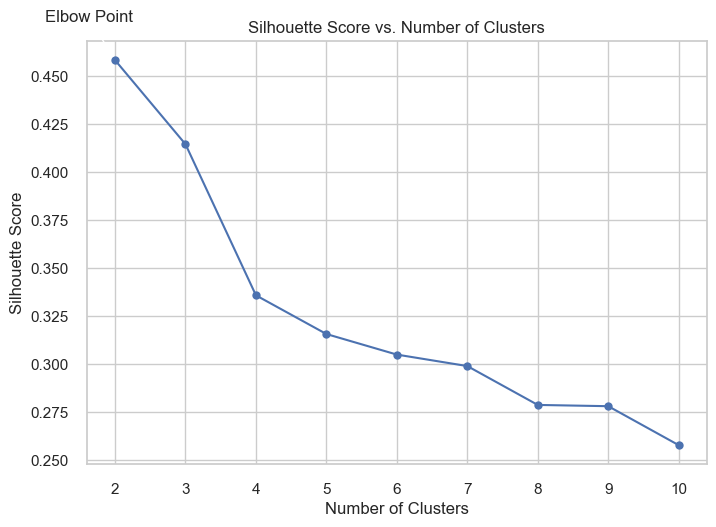

In [135]:
from sklearn.metrics import silhouette_score
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Calculate Silhouette Score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_ds)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)
    print("The cluster:", k , "average silhouette score is:", silhouette_avg)
# Plot Silhouette Scores versus number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)

# Find the index of the maximum silhouette score
max_index = np.argmax(silhouette_scores)

# Annotate the elbow point
plt.annotate('Elbow Point', xy=(cluster_range[max_index], silhouette_scores[max_index]),
             xytext=(cluster_range[max_index] - 1, silhouette_scores[max_index] + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

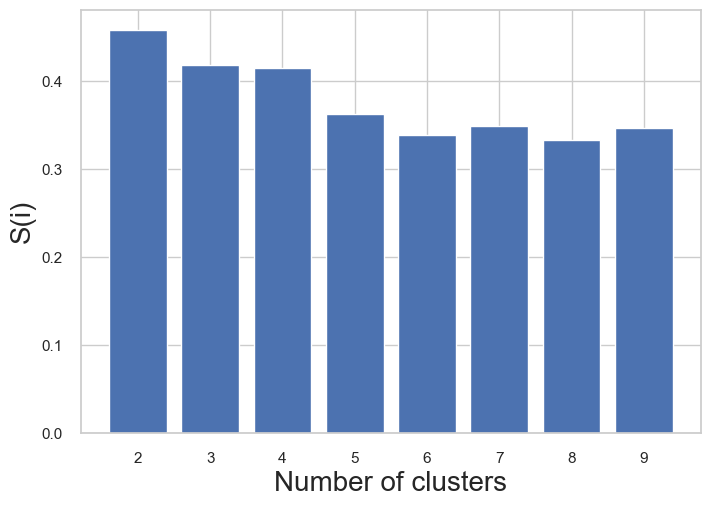

In [136]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, m1.fit_predict(X_pca))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

#### Although score of 3_clusters to 5_clusters is decent  silhouette_score however we are choosing 3_clusters because observations seems to be more evenly distributed among the clusters and making stratgey for 3 cluster is much more convinient and silhouette scores are droping after cluster 3 Scores 

# K-Means Clsutering

#### KMeans is a popular unsupervised learning algorithm used for clustering. The algorithm works by dividing a set of observations into a predetermined number of clusters. The number of clusters is determined by the user before the algorithm is run. KMeans clustering works by first randomly initializing a set of centroids for each cluster. The centroids are points that represent the center of each cluster. The algorithm then iteratively assigns each observation to its closest centroid and updates the centroid position based on the new assignments. The algorithm repeats this process until the centroids no longer move or a maximum number of iterations is reached.

In [137]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=3, random_state=42).fit(X_pca)
pred=kmeans.predict(X_pca)


# Appending those cluster value into main dataframe (without standard-scalar)

customerdata['K_Means_cluster'] = pred + 1

In [138]:
# Analyze the characteristics of each cluster
K_cluster_means = customerdata.groupby('K_Means_cluster').mean()
print(K_cluster_means)

                 Education        Income   Kidhome  Teenhome    Recency  \
K_Means_cluster                                                           
1                 0.667587  35181.173112  0.770718  0.458564  49.029466   
2                 0.573359  75256.832046  0.015444  0.030888  49.418919   
3                 0.546178  60622.942675  0.234076  0.984076  48.998408   

                      Wines     Fruits        Meat       Fish     Sweets  ...  \
K_Means_cluster                                                           ...   
1                 48.669429   5.174033   25.637201   7.787293   5.287293  ...   
2                621.386100  64.399614  460.046332  95.546332  66.548263  ...   
3                487.055732  31.692675  163.769108  41.517516  32.479299  ...   

                       Age        Spent  Living_With  Children  Family_Size  \
K_Means_cluster                                                               
1                52.738490   108.837937     0.643646  1.2292

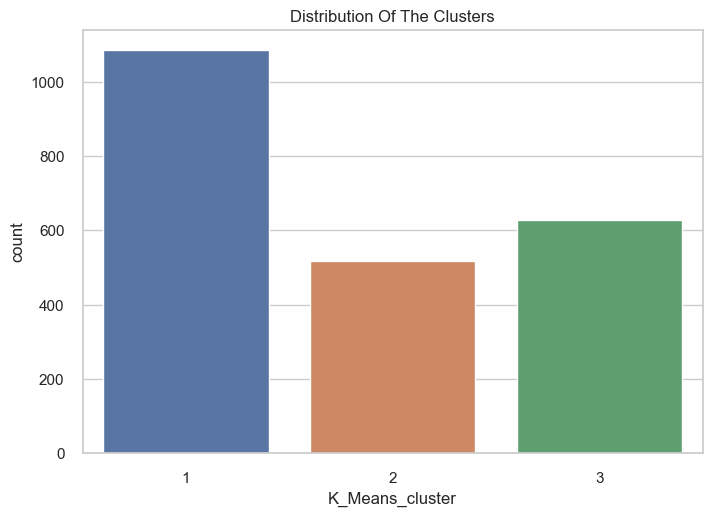

In [139]:
pl = sns.countplot(x=customerdata["K_Means_cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

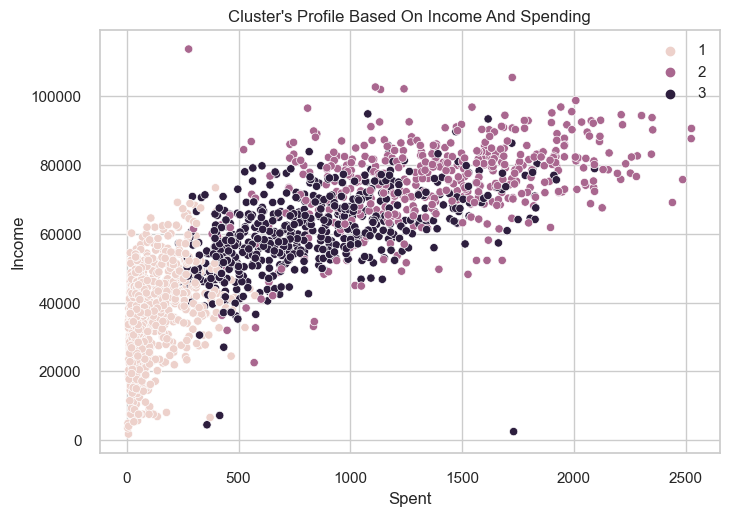

In [140]:
pl = sns.scatterplot(data = customerdata,x=customerdata["Spent"], y=customerdata["Income"],hue=customerdata["K_Means_cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

##### group 1: low spending & low income
##### group 2: high spending & average income
##### group 3: high spending & high income

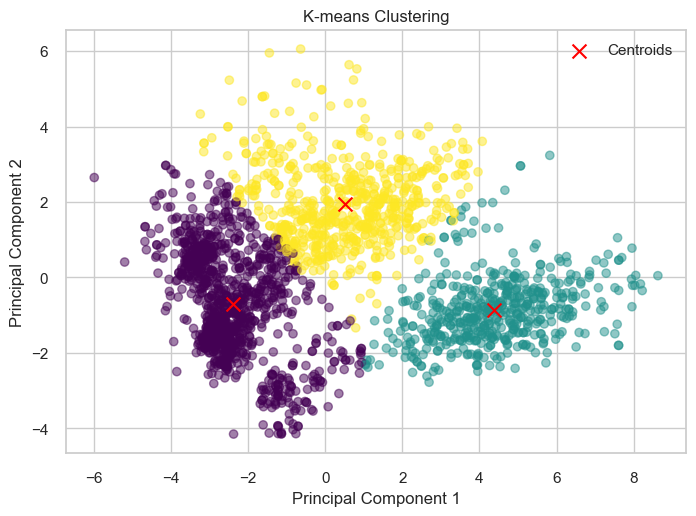

In [141]:
# Plot the data points colored by predicted cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=customerdata['K_Means_cluster'], cmap='viridis',
            marker='o', alpha=0.5)

# Plot cluster centroids (if available)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], c='red',
            marker='x', s=100, label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

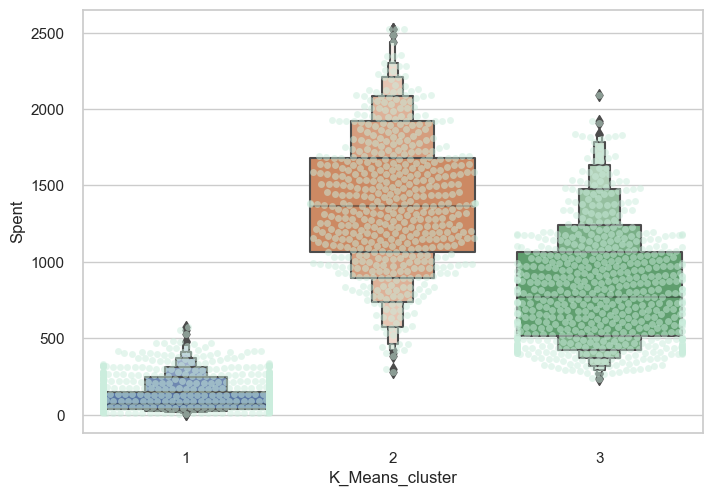

In [143]:
plt.figure()
pl=sns.swarmplot(x=customerdata["K_Means_cluster"], y=customerdata["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=customerdata["K_Means_cluster"], y=customerdata["Spent"])
plt.show()

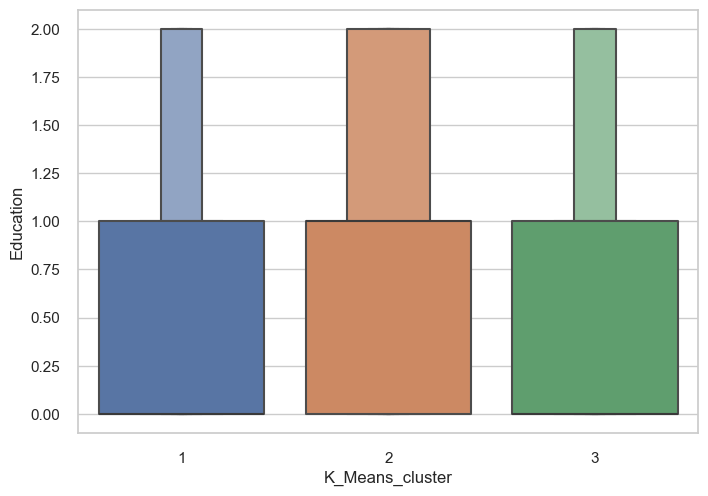

In [122]:
plt.figure()
pl=sns.swarmplot(x=customerdata["K_Means_cluster"], y=customerdata["Education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=customerdata["K_Means_cluster"], y=customerdata["Education"])
plt.show()

##### Next, Will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

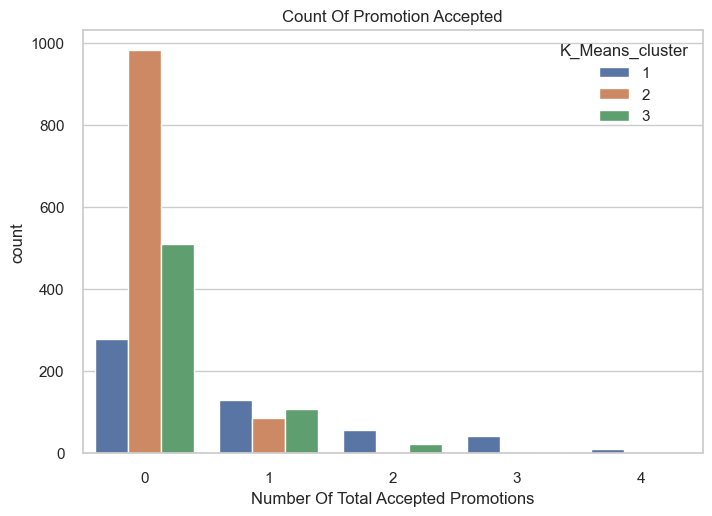

In [101]:
#Creating a feature to get a sum of accepted promotions 
customerdata["Total_Promos"] = customerdata["AcceptedCmp1"]+ customerdata["AcceptedCmp2"]+ customerdata["AcceptedCmp3"]+ customerdata["AcceptedCmp4"]+ customerdata["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=customerdata["Total_Promos"],hue=customerdata["K_Means_cluster"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

##### There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one take part in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

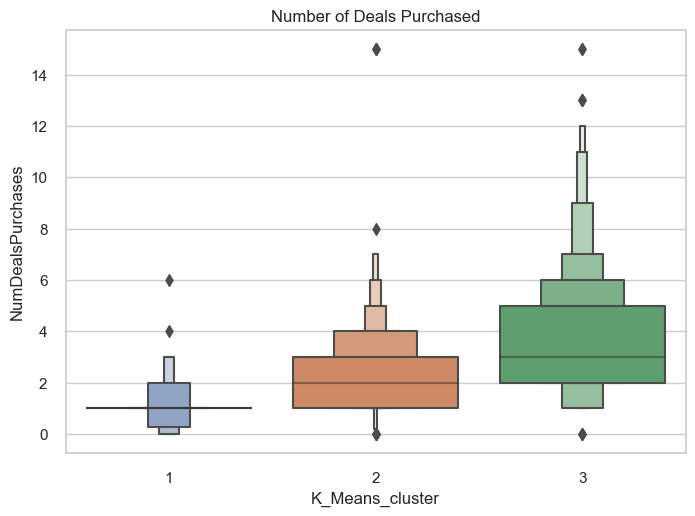

In [102]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=customerdata["NumDealsPurchases"],x=customerdata["K_Means_cluster"])
pl.set_title("Number of Deals Purchased")
plt.show()

## Unlike campaigns, the deals offered did well. It has best outcome with cluster 2 and cluster 3. However, our star customers cluster 1 are not much into the deals.

### Profiling the clusters

##### Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

##### To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

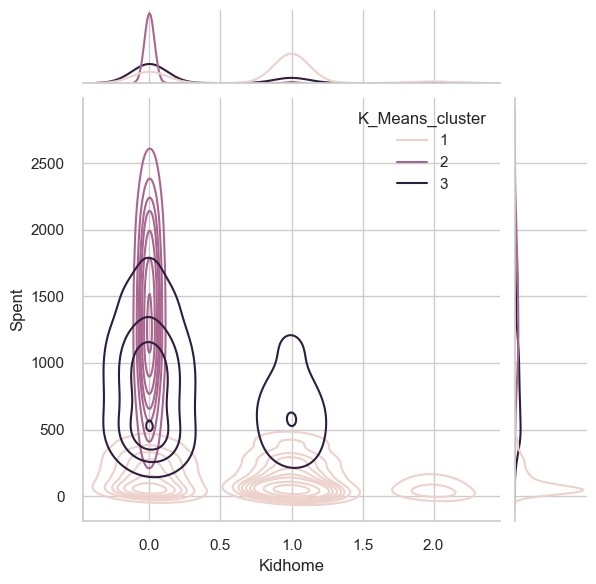

<Figure size 800x550 with 0 Axes>

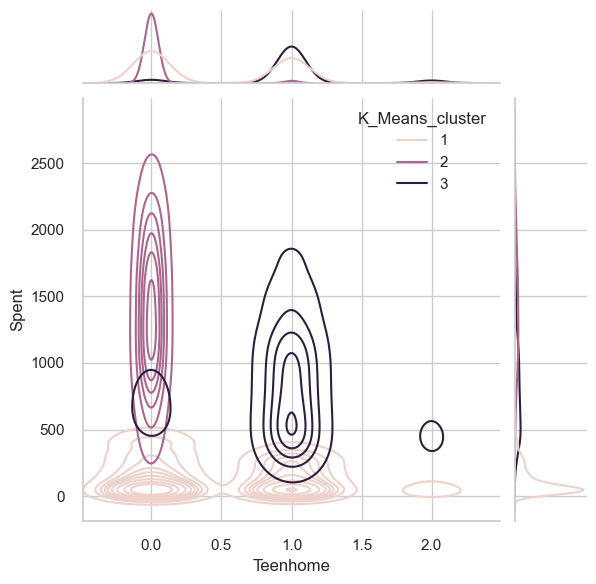

<Figure size 800x550 with 0 Axes>

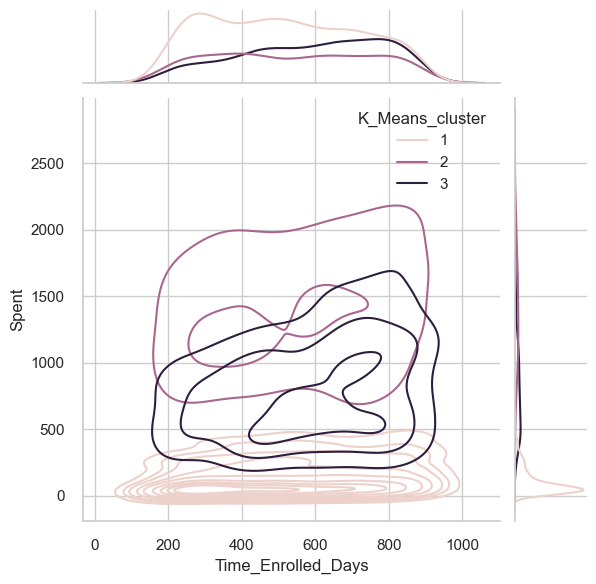

<Figure size 800x550 with 0 Axes>

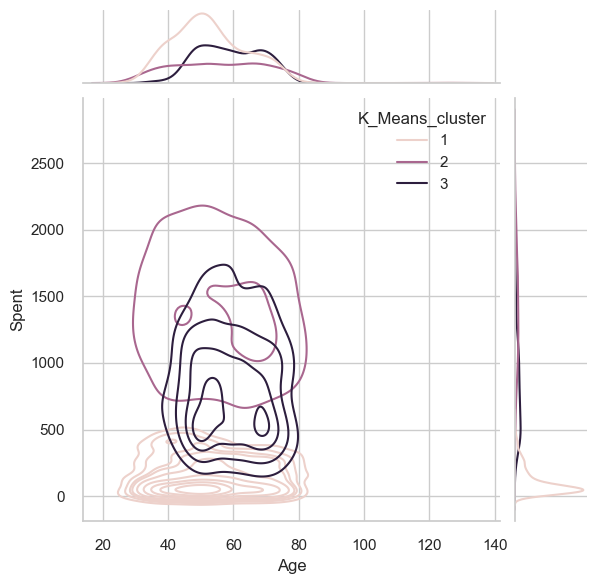

<Figure size 800x550 with 0 Axes>

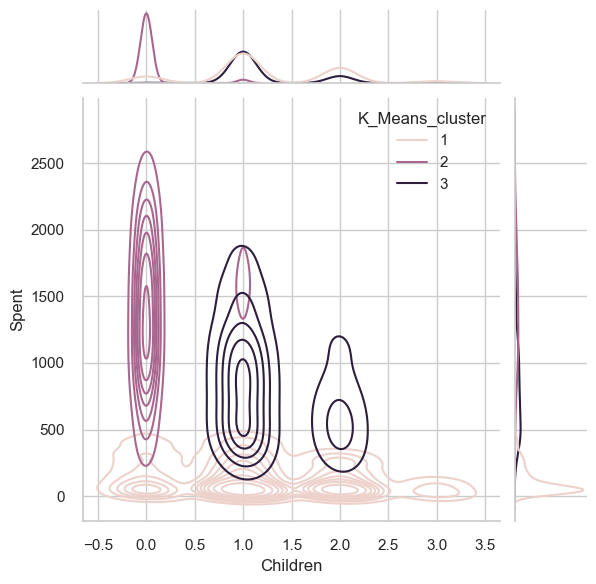

<Figure size 800x550 with 0 Axes>

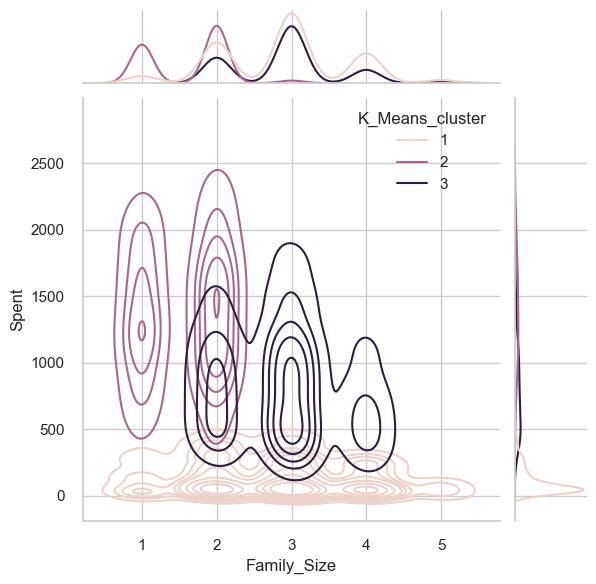

<Figure size 800x550 with 0 Axes>

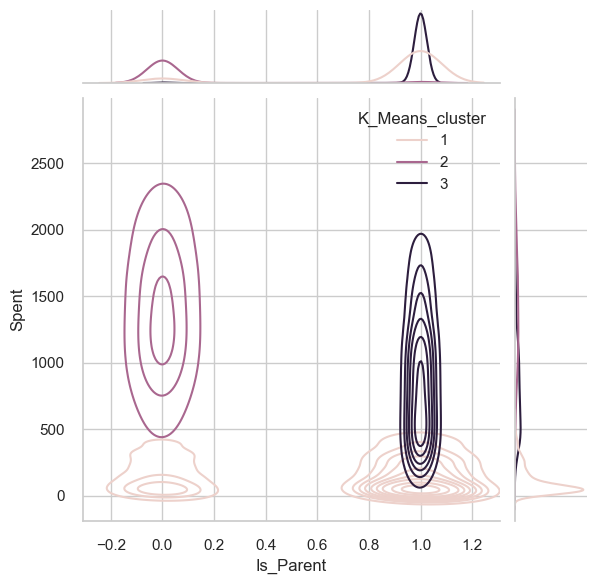

<Figure size 800x550 with 0 Axes>

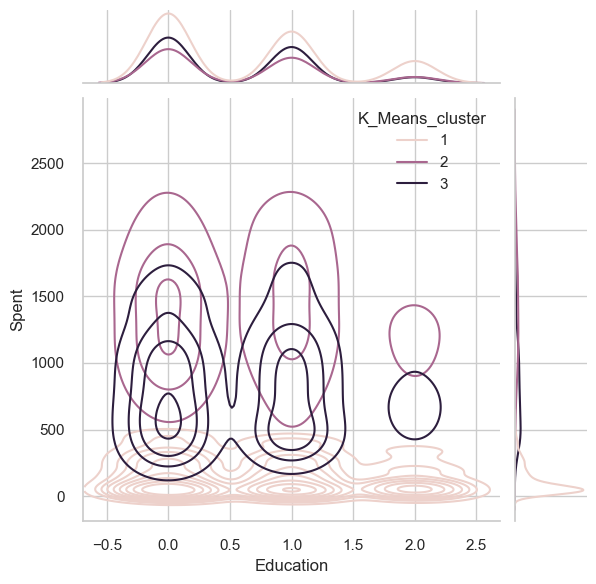

<Figure size 800x550 with 0 Axes>

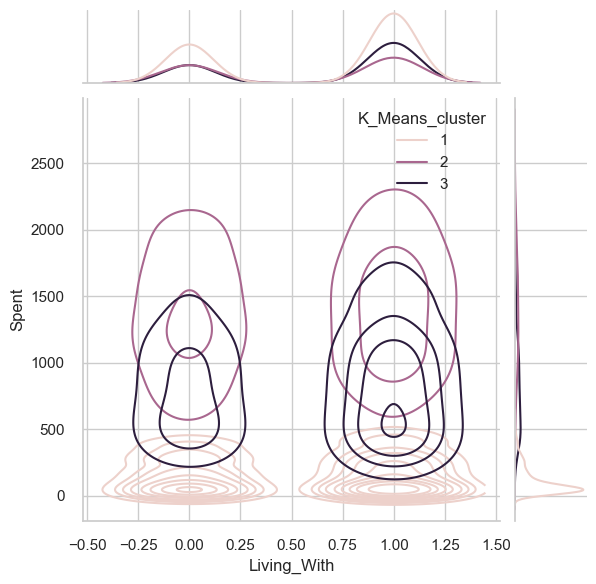

In [144]:
Personal = [ "Kidhome","Teenhome","Time_Enrolled_Days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=customerdata[i], y=customerdata["Spent"], hue =customerdata["K_Means_cluster"], kind="kde")
    plt.show()

##### Cluster 1:
##### Most are education background graduates
##### Age range between = 20-65
##### Income is about 20k to 60k
##### Most have 1-2 kids and some no kids
##### Relationship status wise majority are 'Taken' and some 'Single'
##### Spending is very low: less than 200 bucks

##### Cluster 2:
##### Majority are graduated, some have done masters and phd
##### Age range between = 22-68
##### Income is about 60k to 100k
##### No kids with maybe a few outliers
##### Relationship status wise majority are 'Taken' and some 'Single'
##### 750 < spending > 2500

##### Cluster 3:
##### Majority are graduated and phd, some have done masters
##### Age range Between = 35-65
##### Income is about 400k to 500k
##### Majority have only 1 kid and some have 2 kids
##### Majority are 'Taken', very few 'Single'
##### 250 < spending > 1500

# Model Building - K-Means Clusters

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [146]:
customerdata

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2227          0  61223.0        0         1       46    709      43   182   
2228          1  64014.0        2         1       56    406       0    30   
2229          0  56981.0        0         0       91    908      48   217   
2230          1  69245.0        0         1        8    428      30   214   
2231          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  Spent  Living_With  Children  Family_Size  Is_Parent  \
0      172      88  ...   1617            0         0            1          0   
1        2       1  ...     27            0         2            3          1   
2      111      21  ...    776            1         0            2          0   
3       10       3  ...     53            1         1            3          1   
4       46      27  ...    422            1         1            3          1   
...    ...     ...  ...    ...          ...       ...          ...        ...   
2227    42     118  ...   1341            1         1            3          1   
2228     0       0  ...    444            1         3            5          1   
2229    32      12  ...   1241            0         0            1          0   
2230    80      30  ...    843            1         1            3          1   
2231     2       1  ...    172            1         2            4          1   

      K_Means_cluster  Total_Promos  Agglomerative_Cluster  DBSCAN_Cluster  \
0                   2             0                      0              -1   
1                   1             0                      1               0   
2                   2             0                      0              13   
3                   1             0                      1               1   
4                   1             0                      1              -1   
...               ...           ...                    ...             ...   
2227                3             0                      2              -1   
2228                3             1                      2              -1   
2229                2             1                      1              -1   
2230                3             0                      2              -1   
2231                1             0                      1              -1   

      Hybrid_Cluster  
0                  1  
1                  3  
2                  1  
3                  0  
4                  0  
...              ...  
2227               2  
2228               3  
2229               1  
2230               2  
2231               3  

[2232 rows x 35 columns]

In [158]:
X = customerdata.drop(columns=["K_Means_cluster"])
y = customerdata['K_Means_cluster']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize all classifiers with the same set of hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, clf in classifiers.items():
    print(f"\033[1mTraining {name}...\033[0m")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    if len(np.unique(y_test)) == 2:  # Binary classification
        if hasattr(clf, "decision_function"):
            y_decision = clf.decision_function(X_test)
        else:
            y_decision = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_decision)
        auc = roc_auc_score(y_test, y_decision)
        print("AUC:", auc)
    else:  # Multiclass classification
        y_proba = clf.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        
        print("AUC:", auc)
    cv_scores = cross_val_score(clf, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())
    print("--------------------------------------------------")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.86
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       221
           2       0.77      0.74      0.76        94
           3       0.77      0.80      0.78       132

    accuracy                           0.86       447
   macro avg       0.83      0.83      0.83       447
weighted avg       0.86      0.86      0.86       447

Confusion Matrix:
[[211   1   9]
 [  1  70  23]
 [  7  20 105]]
AUC: 0.9613690101266671
Cross-Validation Scores: [0.88590604 0.83892617 0.86098655 0.84977578 0.86547085]
Mean Cross-Validation Score: 0.8602130797243206
--------------------------------------------------
Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.79
Classification Report of Support Vector Machine:
              precision    recall  f1-score   support

           1       0.90      0.91      0.91       221


Based on the performance metrics provided for each classifier, we can summarize the best fit for the K-means clustering approach by considering accuracy, AUC, and cross-validation scores. Here's a detailed summary of the results for the various classifiers:

### Summary of Classifier Performance

1. **Logistic Regression**
   - **Accuracy**: 0.86
   - **AUC**: 0.9614
   - **Mean Cross-Validation Score**: 0.8602
   - **Classification Report**:
     - Precision: High for class 1 (0.96), moderate for classes 2 and 3 (0.77, 0.77)
     - Recall: Very high for class 1 (0.95), moderate for classes 2 and 3 (0.74, 0.80)

2. **Support Vector Machine (SVM)**
   - **Accuracy**: 0.79
   - **AUC**: 0.9099
   - **Mean Cross-Validation Score**: 0.7836
   - **Classification Report**:
     - Precision: High for class 1 (0.90), moderate for classes 2 and 3 (0.75, 0.66)
     - Recall: Very high for class 1 (0.91), moderate for classes 2 and 3 (0.60, 0.73)

3. **Random Forest**
   - **Accuracy**: 0.99
   - **AUC**: 0.9996
   - **Mean Cross-Validation Score**: 0.9807
   - **Classification Report**:
     - Precision: Very high across all classes (0.98, 0.99, 0.99)
     - Recall: Very high across all classes (0.99, 0.99, 0.98)

4. **Gradient Boosting**
   - **Accuracy**: 0.98
   - **AUC**: 0.9997
   - **Mean Cross-Validation Score**: 0.9816
   - **Classification Report**:
     - Precision: Very high across all classes (0.99, 0.98, 0.98)
     - Recall: Very high across all classes (0.99, 0.98, 0.98)

5. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 0.86
   - **AUC**: 0.9385
   - **Mean Cross-Validation Score**: 0.8522
   - **Classification Report**:
     - Precision: High for class 1 (0.94), moderate for classes 2 and 3 (0.78, 0.77)
     - Recall: Very high for class 1 (0.97), moderate for classes 2 and 3 (0.72, 0.77)

6. **Naive Bayes**
   - **Accuracy**: 0.96
   - **AUC**: 0.9938
   - **Mean Cross-Validation Score**: 0.9574
   - **Classification Report**:
     - Precision: Very high for class 1 (1.00), high for classes 2 and 3 (0.98, 0.88)
     - Recall: Very high for classes 1 and 3 (0.95, 0.98), high for class 2 (0.95)

7. **Decision Tree**
   - **Accuracy**: 0.98
   - **AUC**: 0.9848
   - **Mean Cross-Validation Score**: 0.9651
   - **Classification Report**:
     - Precision: Very high for classes 1 and 2 (0.99, 0.99), high for class 3 (0.96)
     - Recall: Very high for classes 1 and 3 (0.98, 0.98), high for class 2 (0.98)

### Best Fit for K-Means

When considering the best fit for K-means clustering, we focus on models that offer a balance of high accuracy, high AUC, and consistent performance across cross-validation.

1. **Random Forest**:
   - **Accuracy**: 0.99 (highest among all models)
   - **AUC**: 0.9996 (highest)
   - **Mean Cross-Validation Score**: 0.9807 (among the highest)
   - **Summary**: Random Forest demonstrates the highest accuracy, very high AUC, and very high mean cross-validation score, making it the most robust and reliable model overall.

2. **Gradient Boosting**:
   - **Accuracy**: 0.98
   - **AUC**: 0.9997 (highest)
   - **Mean Cross-Validation Score**: 0.9816 (highest)
   - **Summary**: Gradient Boosting also performs exceptionally well with very high accuracy and AUC, making it another strong candidate.

3. **Decision Tree**:
   - **Accuracy**: 0.98
   - **AUC**: 0.9848
   - **Mean Cross-Validation Score**: 0.9651
   - **Summary**: Decision Tree performs very well with high accuracy and AUC, and a strong cross-validation score, making it a solid choice.

4. **Naive Bayes**:
   - **Accuracy**: 0.96
   - **AUC**: 0.9938
   - **Mean Cross-Validation Score**: 0.9574
   - **Summary**: Naive Bayes performs very well with high accuracy and AUC, and a strong cross-validation score, making it a solid choice.

### Conclusion

The **Random Forest** classifier is the best fit for K-means clustering due to its highest accuracy, very high AUC, and high mean cross-validation score, demonstrating robustness and reliability across different data splits. **Gradient Boosting** is a very close second, with excellent performance metrics making it another highly suitable option. **Decision Tree** and **Naive Bayes** are also strong performers and can be considered depending on specific needs and constraints of the clustering task.

# Agglomerative Clustering

##### Agglomerative Clustering is another popular clustering algorithm that works by iteratively merging the closest pairs of clusters until all the observations belong to a single cluster. The algorithm starts by assigning each observation to its own cluster. It then iteratively merges the closest pair of clusters based on a distance metric until all observations belong to a single cluster.

In [159]:
# Perform hierarchical clustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative_cluster.fit_predict(X_pca)
# Add cluster labels to the original dataset
customerdata['Agglomerative_Cluster'] = clusters

In [160]:
# Analyze the characteristics of each cluster
Ag_cluster_means = customerdata.groupby('Agglomerative_Cluster').mean()
print(Ag_cluster_means)

                       Education        Income   Kidhome  Teenhome    Recency  \
Agglomerative_Cluster                                                           
0                       0.652209  37414.237751  0.742169  0.534137  48.638554   
1                       0.580198  75322.493069  0.011881  0.031683  49.439604   
2                       0.539419  63573.477178  0.128631  0.935685  49.987552   

                            Wines     Fruits        Meat       Fish  \
Agglomerative_Cluster                                                 
0                       83.077912   6.138956   33.950201   9.184739   
1                      632.974257  63.213861  459.829703  91.794059   
2                      534.273859  40.072614  196.080913  54.423237   

                          Sweets  ...        Age        Spent  Living_With  \
Agglomerative_Cluster             ...                                        
0                       6.365462  ...  53.592771   159.245783     0.660241   
1   

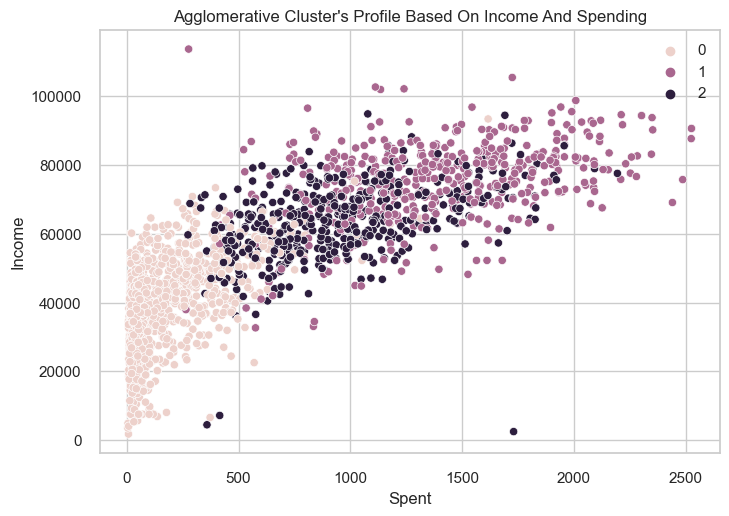

In [161]:
pl = sns.scatterplot(data = customerdata,x=customerdata["Spent"], y=customerdata["Income"],hue=customerdata["Agglomerative_Cluster"])
pl.set_title("Agglomerative Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

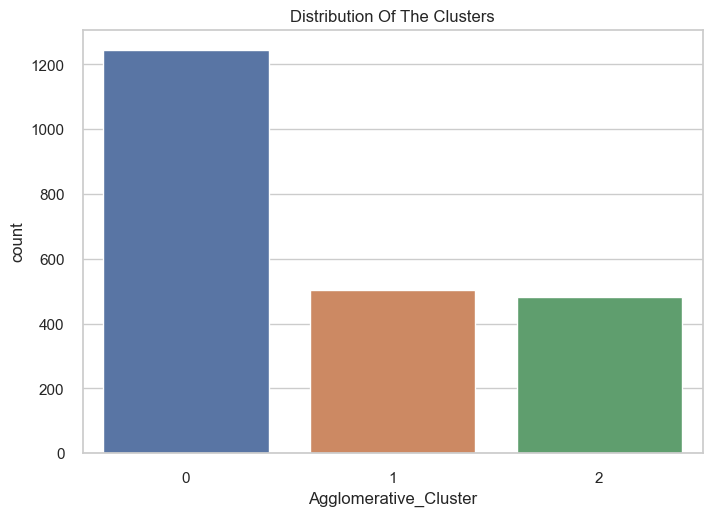

In [162]:
pl = sns.countplot(x=customerdata["Agglomerative_Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

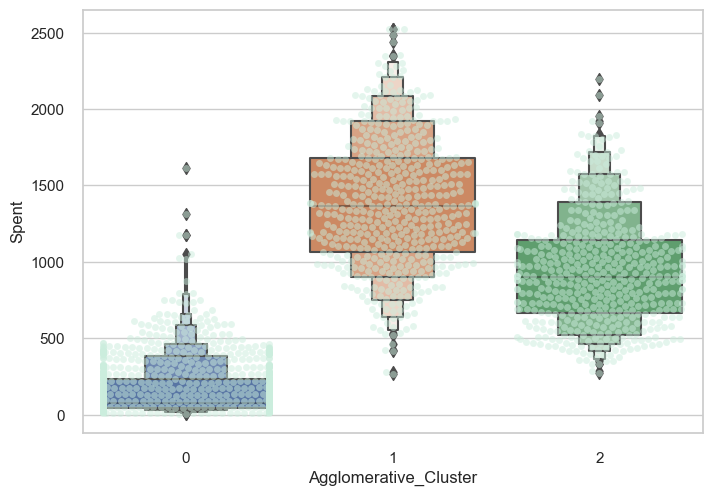

In [163]:
plt.figure()
pl=sns.swarmplot(x=customerdata["Agglomerative_Cluster"], y=customerdata["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=customerdata["Agglomerative_Cluster"], y=customerdata["Spent"])
plt.show()

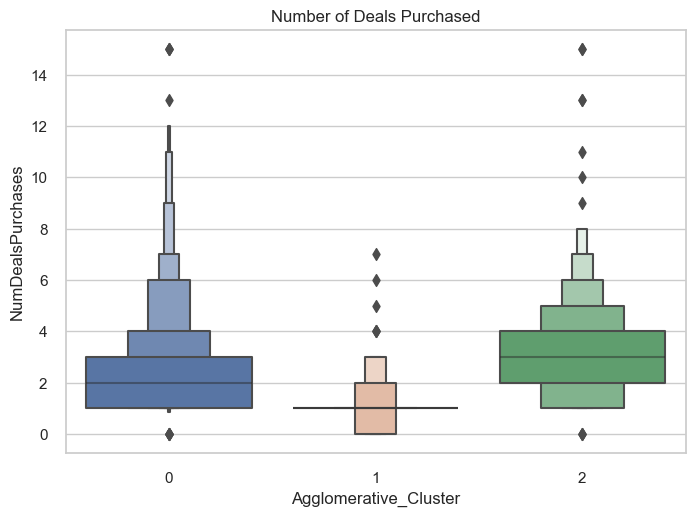

In [164]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=customerdata["NumDealsPurchases"],x=customerdata["Agglomerative_Cluster"])
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

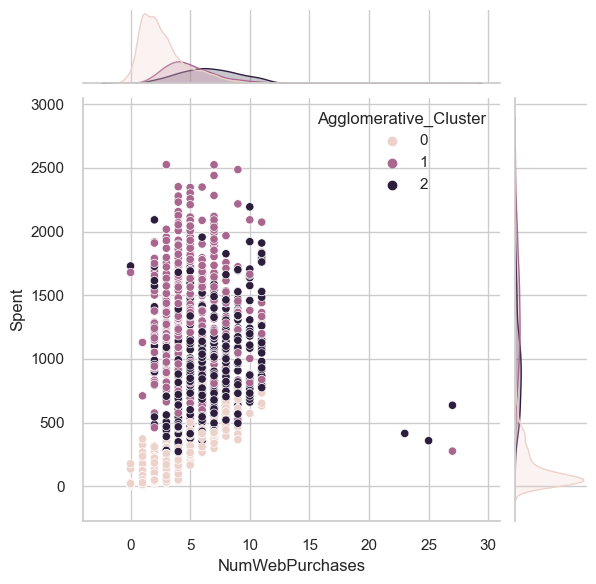

<Figure size 800x550 with 0 Axes>

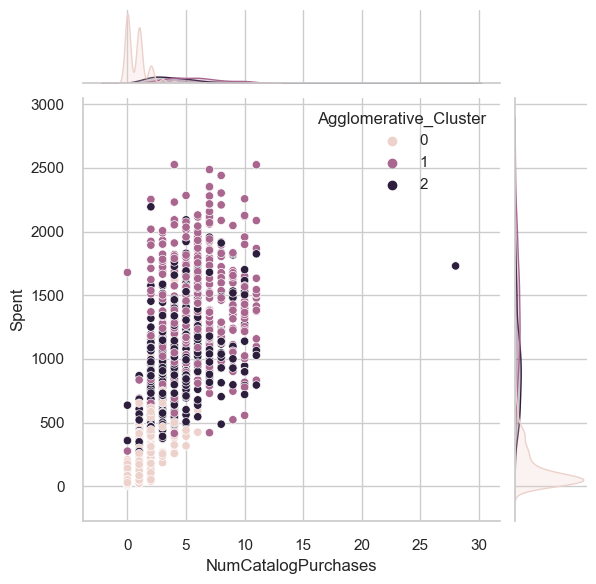

<Figure size 800x550 with 0 Axes>

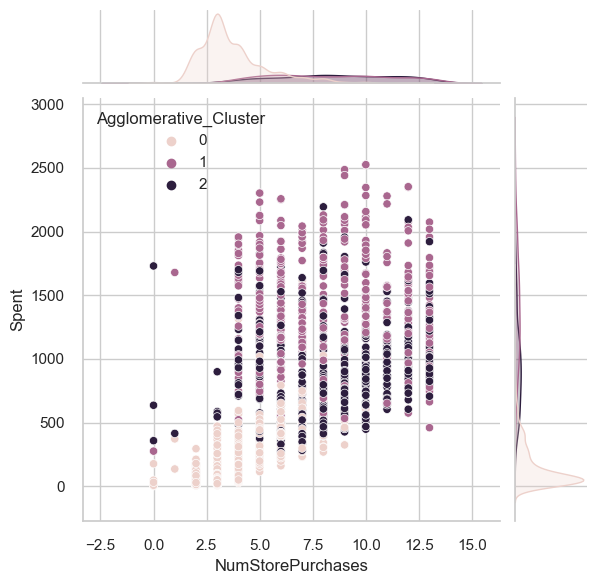

<Figure size 800x550 with 0 Axes>

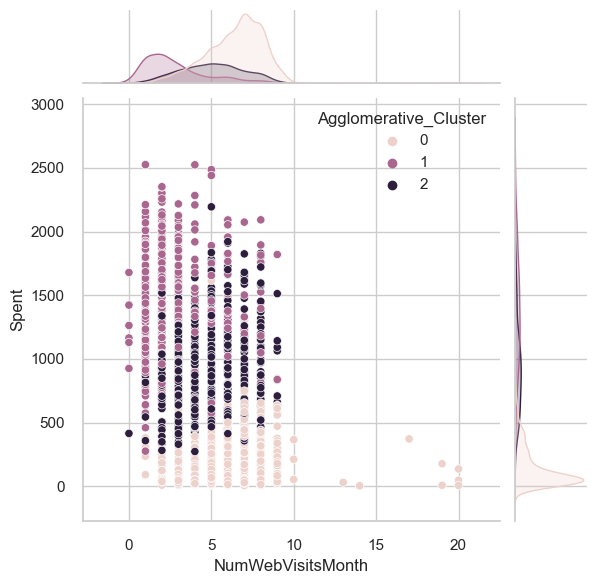

In [165]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=customerdata[i],y = customerdata["Spent"],hue=customerdata["Agglomerative_Cluster"])
    plt.show()

### Profiling Clustering

<Figure size 800x550 with 0 Axes>

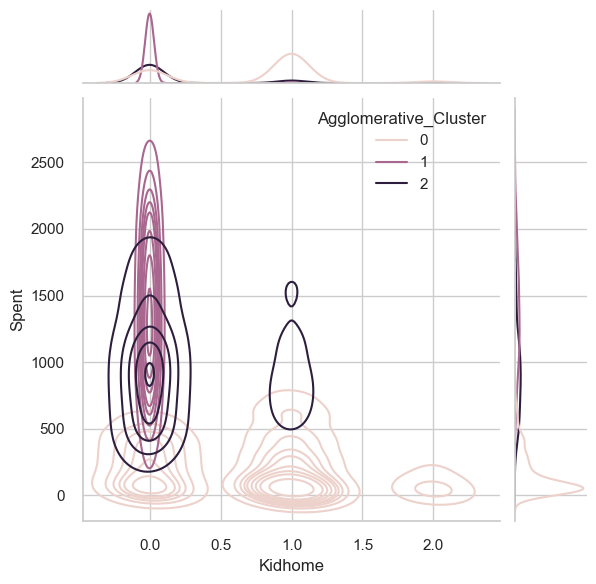

<Figure size 800x550 with 0 Axes>

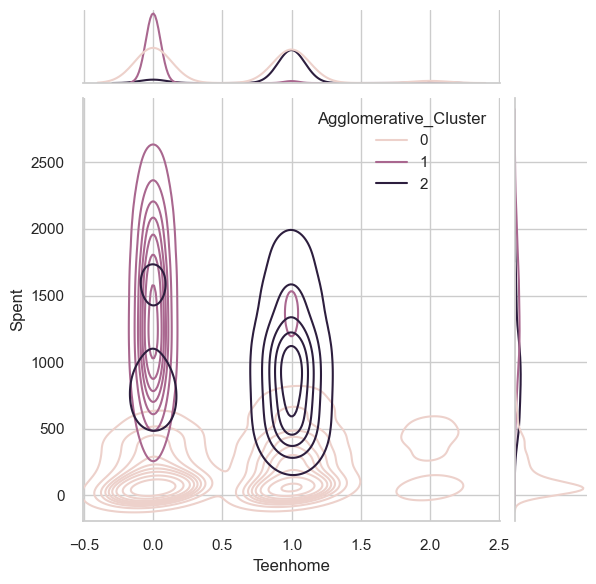

<Figure size 800x550 with 0 Axes>

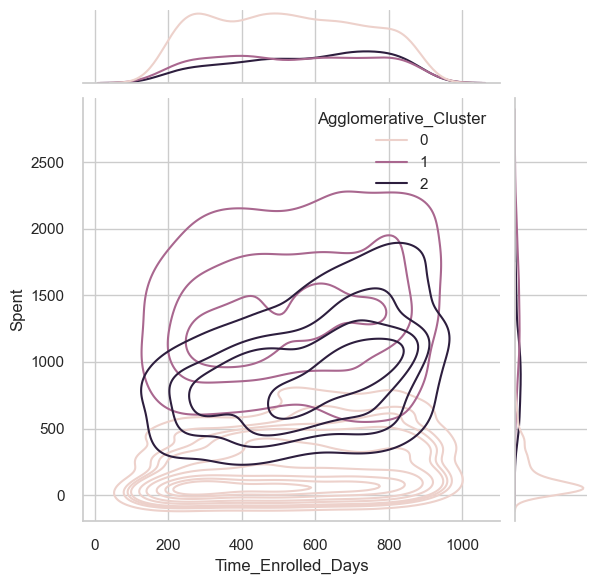

<Figure size 800x550 with 0 Axes>

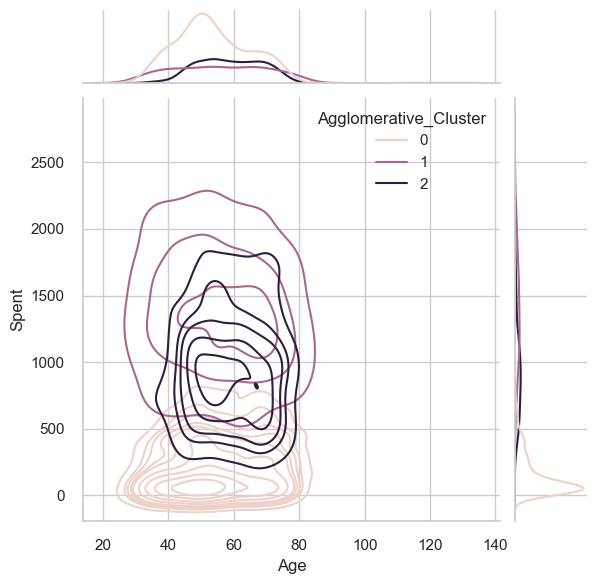

<Figure size 800x550 with 0 Axes>

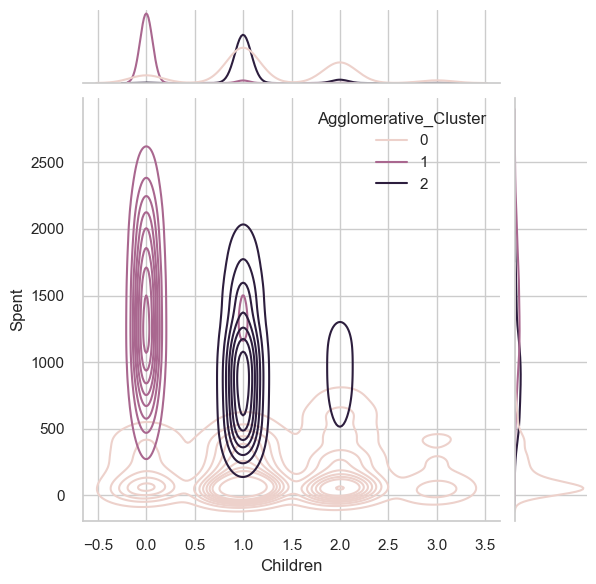

<Figure size 800x550 with 0 Axes>

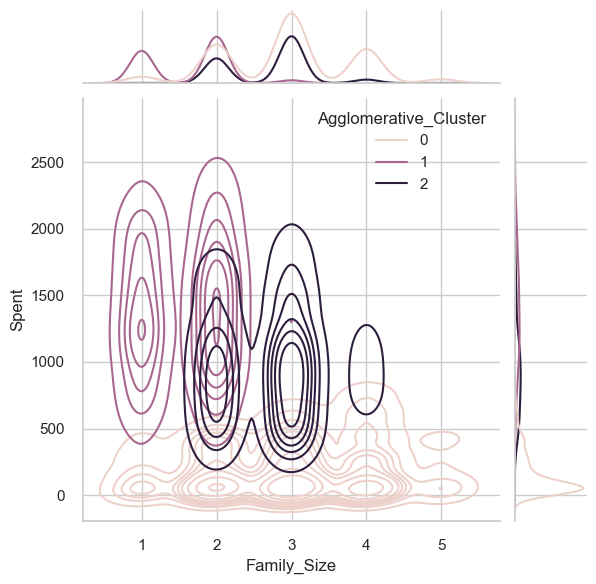

<Figure size 800x550 with 0 Axes>

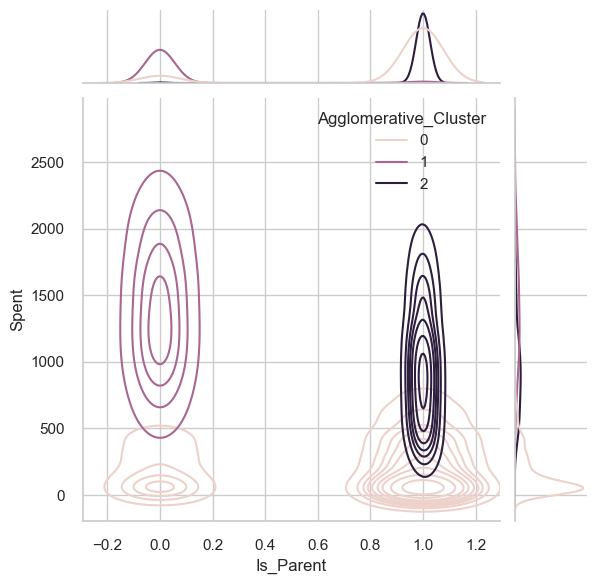

<Figure size 800x550 with 0 Axes>

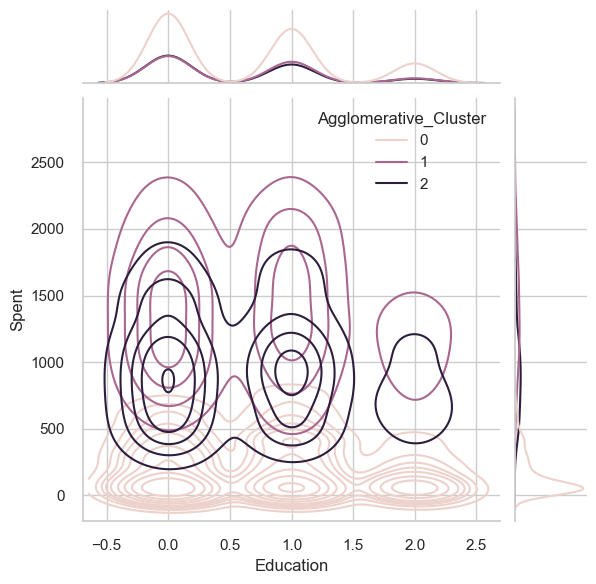

<Figure size 800x550 with 0 Axes>

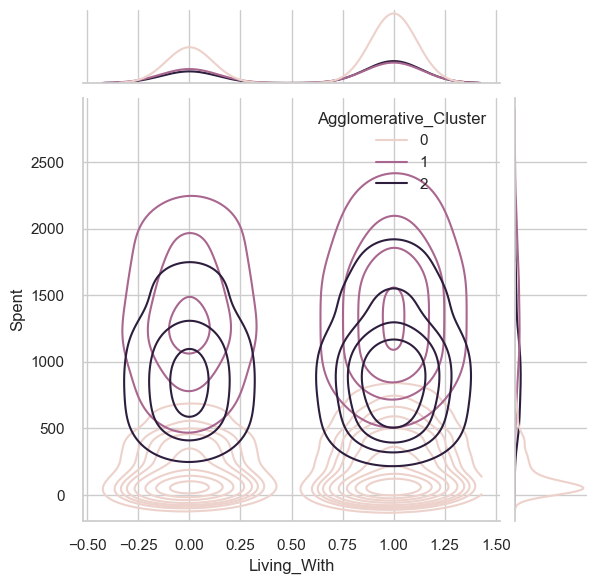

In [166]:
Personal = [ "Kidhome","Teenhome","Time_Enrolled_Days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=customerdata[i], y=customerdata["Spent"], hue =customerdata["Agglomerative_Cluster"], kind="kde")
    plt.show()

# Model Building - Agglomerative Cluster

In [167]:
X = customerdata.drop(columns=["Agglomerative_Cluster"])
y = customerdata['Agglomerative_Cluster']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize all classifiers with the same set of hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, clf in classifiers.items():
    print(f"\033[1mTraining {name}...\033[0m")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    if len(np.unique(y_test)) == 2:  # Binary classification
        if hasattr(clf, "decision_function"):
            y_decision = clf.decision_function(X_test)
        else:
            y_decision = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_decision)
        auc = roc_auc_score(y_test, y_decision)
        print("AUC:", auc)
    else:  # Multiclass classification
        y_proba = clf.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        
        print("AUC:", auc)
    cv_scores = cross_val_score(clf, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())
    print("--------------------------------------------------")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.87
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       247
           1       0.77      0.78      0.77        92
           2       0.76      0.69      0.72       108

    accuracy                           0.87       447
   macro avg       0.82      0.81      0.82       447
weighted avg       0.86      0.87      0.86       447

Confusion Matrix:
[[241   0   6]
 [  2  72  18]
 [ 12  22  74]]
AUC: 0.9585481776242898
Cross-Validation Scores: [0.83892617 0.82102908 0.87219731 0.86098655 0.83632287]
Mean Cross-Validation Score: 0.8458923967456184
--------------------------------------------------
Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.76
Classification Report of Support Vector Machine:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       247


Based on the performance metrics provided for each classifier, we can summarize the best fit in an augmented cluster approach by considering accuracy, AUC, and cross-validation scores. Here’s a detailed summary of the results:

### Summary of Classifier Performance

1. **Logistic Regression**
   - **Accuracy**: 0.87
   - **AUC**: 0.9585
   - **Mean Cross-Validation Score**: 0.8459
   - **Classification Report**:
     - Precision: High for class 0 (0.95), moderate for classes 1 and 2 (0.77, 0.76)
     - Recall: Very high for class 0 (0.98), moderate for classes 1 and 2 (0.78, 0.69)

2. **Support Vector Machine (SVM)**
   - **Accuracy**: 0.76
   - **AUC**: 0.8996
   - **Mean Cross-Validation Score**: 0.7845
   - **Classification Report**:
     - Precision: High for class 0 (0.85), moderate for classes 1 and 2 (0.70, 0.58)
     - Recall: Very high for class 0 (0.93), moderate for classes 1 and 2 (0.59, 0.53)

3. **Random Forest**
   - **Accuracy**: 0.98
   - **AUC**: 0.9996
   - **Mean Cross-Validation Score**: 0.9727
   - **Classification Report**:
     - Precision: Very high across all classes (0.99, 1.00, 0.95)
     - Recall: Very high across all classes (0.99, 0.98, 0.97)

4. **Gradient Boosting**
   - **Accuracy**: 0.99
   - **AUC**: 0.9994
   - **Mean Cross-Validation Score**: 0.9673
   - **Classification Report**:
     - Precision: Very high across all classes (0.99, 1.00, 0.97)
     - Recall: Very high across all classes (0.99, 0.99, 0.97)

5. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 0.82
   - **AUC**: 0.9204
   - **Mean Cross-Validation Score**: 0.8315
   - **Classification Report**:
     - Precision: High for class 0 (0.91), moderate for classes 1 and 2 (0.74, 0.67)
     - Recall: High for class 0 (0.94), moderate for classes 1 and 2 (0.71, 0.63)

6. **Naive Bayes**
   - **Accuracy**: 0.94
   - **AUC**: 0.9871
   - **Mean Cross-Validation Score**: 0.9279
   - **Classification Report**:
     - Precision: Very high for class 0 (1.00), high for classes 1 and 2 (0.91, 0.83)
     - Recall: Very high for class 0 (0.93), high for classes 1 and 2 (0.91, 0.96)

7. **Decision Tree**
   - **Accuracy**: 0.96
   - **AUC**: 0.9722
   - **Mean Cross-Validation Score**: 0.9534
   - **Classification Report**:
     - Precision: Very high for classes 0 and 1 (0.98, 0.99), high for class 2 (0.90)
     - Recall: Very high for classes 0 and 1 (0.97, 0.97), high for class 2 (0.95)

### Best Fit in Augmented Cluster

When considering the best fit for an augmented cluster approach, we should focus on models that offer a balance of high accuracy, high AUC, and consistent performance across cross-validation.

1. **Gradient Boosting**:
   - **Accuracy**: 0.99 (highest among all models)
   - **AUC**: 0.9994 (very close to the highest)
   - **Mean Cross-Validation Score**: 0.9673 (among the highest)
   - **Summary**: Gradient Boosting demonstrates the highest accuracy, very high AUC, and very high mean cross-validation score, making it the most robust and reliable model overall.

2. **Random Forest**:
   - **Accuracy**: 0.98
   - **AUC**: 0.9996 (highest among all models)
   - **Mean Cross-Validation Score**: 0.9727 (highest)
   - **Summary**: Random Forest also performs exceptionally well with the highest AUC and very high accuracy and cross-validation score, making it another strong candidate.

3. **Decision Tree**:
   - **Accuracy**: 0.96
   - **AUC**: 0.9722
   - **Mean Cross-Validation Score**: 0.9534
   - **Summary**: Decision Tree performs very well with high accuracy and AUC, and a strong cross-validation score, making it a solid choice for certain scenarios.

### Conclusion

The **Gradient Boosting** classifier is the best fit in an augmented cluster approach due to its highest accuracy, very high AUC, and high mean cross-validation score, demonstrating robustness and reliability across different data splits. **Random Forest** is a very close second, with excellent performance metrics making it another highly suitable option. **Decision Tree** is also a strong performer and can be considered depending on specific needs and constraints of the clustering task.

# Hybrid clustering

In [172]:
# Parameters for hybrid clustering
k_kmeans = 4  # Number of clusters for KMeans
eps_dbscan = 0.5  # DBSCAN epsilon parameter
min_samples_dbscan = 4  # DBSCAN min_samples parameter

# Perform hybrid clustering
# KMeans clustering
kmeans = KMeans(n_clusters=k_kmeans)
kmeans.fit(scaled_ds)
kmeans_labels = kmeans.labels_
    
# DBSCAN clustering
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
dbscan.fit(scaled_ds)
dbscan_labels = dbscan.labels_
    
# Combine cluster labels from KMeans and DBSCAN
hybrid_labels = np.where(dbscan_labels == -1, kmeans_labels, dbscan_labels)
    
# Add the hybrid cluster labels to your DataFrame
customerdata['Hybrid_Cluster'] = hybrid_labels

# Print size of each hybrid cluster
print(customerdata['Hybrid_Cluster'].value_counts())

silhouette_avg = silhouette_score(scaled_ds, hybrid_labels)
print("The average silhouette score for the hybrid clustering model is:", silhouette_avg)

3    622
0    591
2    517
1    502
Name: Hybrid_Cluster, dtype: int64
The average silhouette score for the hybrid clustering model is: 0.11340991832818383


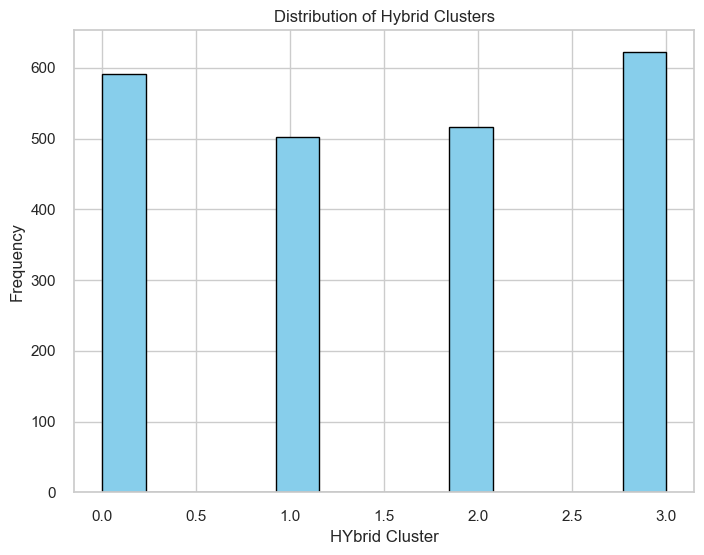

In [174]:
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(customerdata['Hybrid_Cluster'], bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('HYbrid Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Hybrid Clusters')
plt.grid(True)
plt.show()

In [175]:
# Parameters for hybrid clustering
k_kmeans = 3  # Number of clusters for KMeans
eps_dbscan = 0.5  # DBSCAN epsilon parameter
min_samples_dbscan = 4  # DBSCAN min_samples parameter

# Perform hybrid clustering
# KMeans clustering
kmeans = KMeans(n_clusters=k_kmeans)
kmeans.fit(scaled_ds)
kmeans_labels = kmeans.labels_
    
# DBSCAN clustering
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
dbscan.fit(scaled_ds)
dbscan_labels = dbscan.labels_
    
# Combine cluster labels from KMeans and DBSCAN
hybrid_labels = np.where(dbscan_labels == -1, kmeans_labels, dbscan_labels)
    
# Add the hybrid cluster labels to your DataFrame
customerdata['Hybrid_Cluster'] = hybrid_labels

# Print size of each hybrid cluster
print(customerdata['Hybrid_Cluster'].value_counts())

silhouette_avg = silhouette_score(scaled_ds, hybrid_labels)
print("The average silhouette score for the hybrid clustering model is:", silhouette_avg)

1    1078
0     640
2     514
Name: Hybrid_Cluster, dtype: int64
The average silhouette score for the hybrid clustering model is: 0.1786403718956119


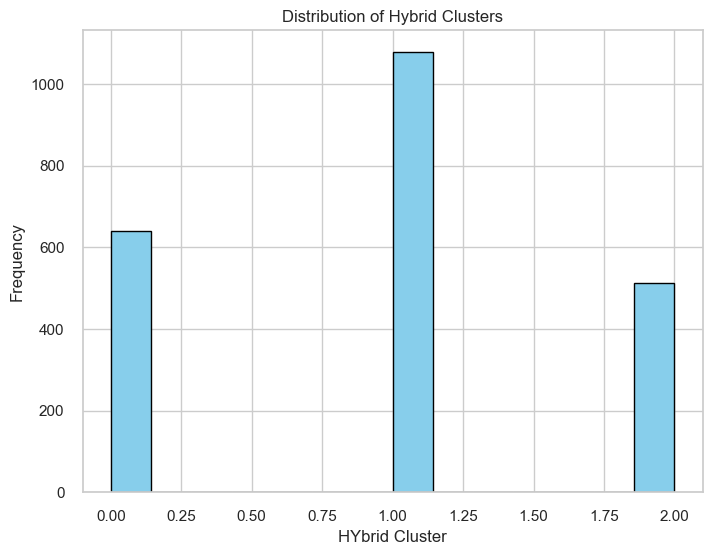

In [176]:
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(customerdata['Hybrid_Cluster'], bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('HYbrid Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Hybrid Clusters')
plt.grid(True)
plt.show()

## Profiling Clusters

<Figure size 800x550 with 0 Axes>

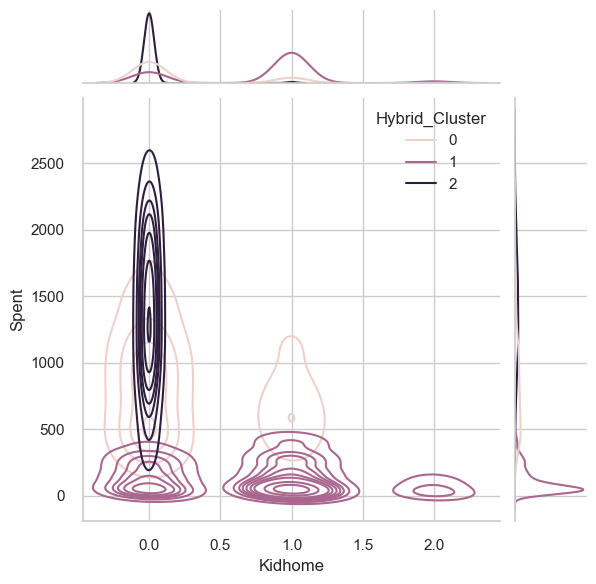

<Figure size 800x550 with 0 Axes>

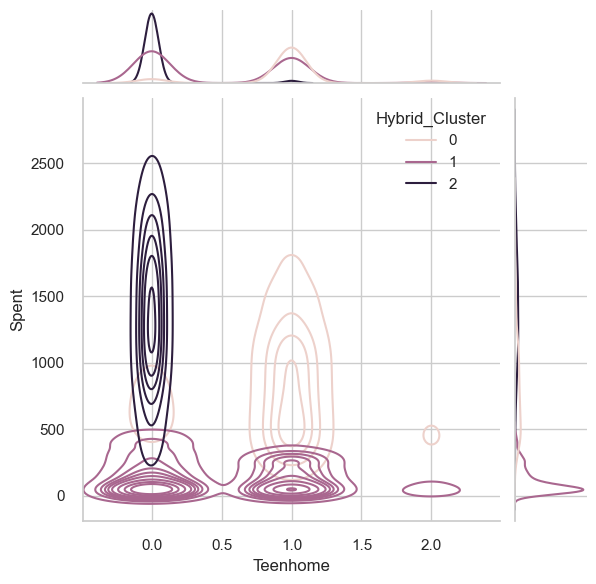

<Figure size 800x550 with 0 Axes>

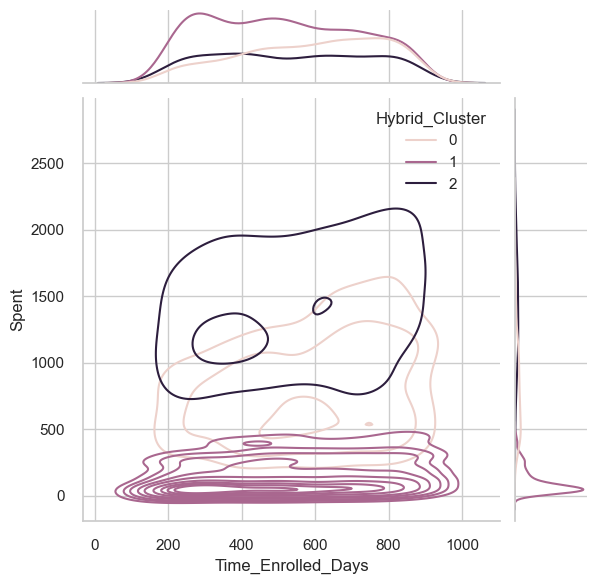

<Figure size 800x550 with 0 Axes>

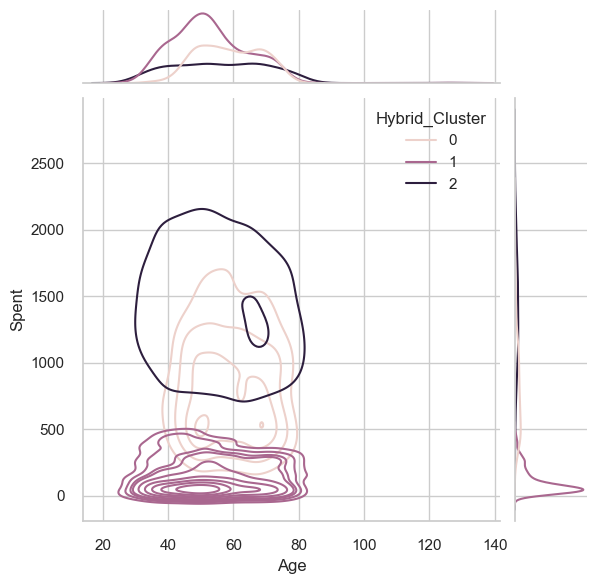

<Figure size 800x550 with 0 Axes>

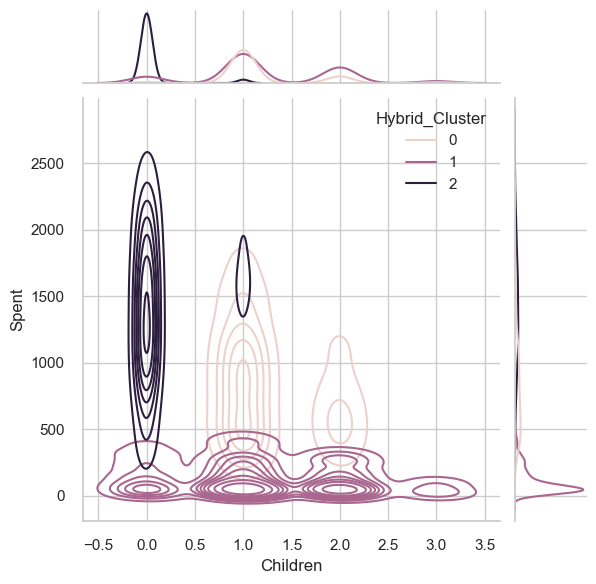

<Figure size 800x550 with 0 Axes>

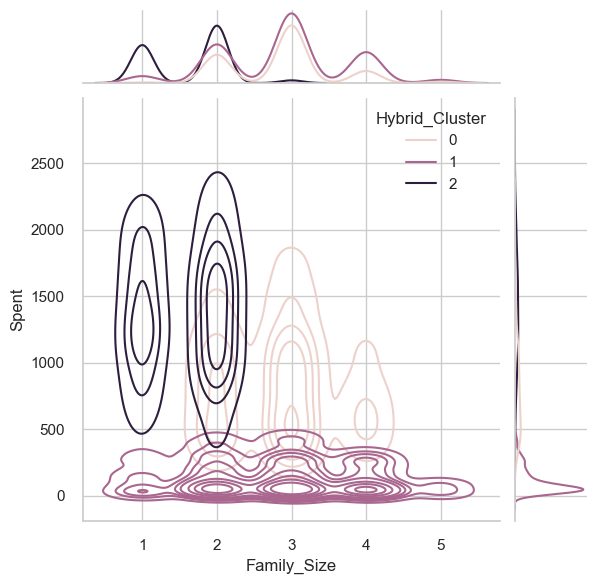

<Figure size 800x550 with 0 Axes>

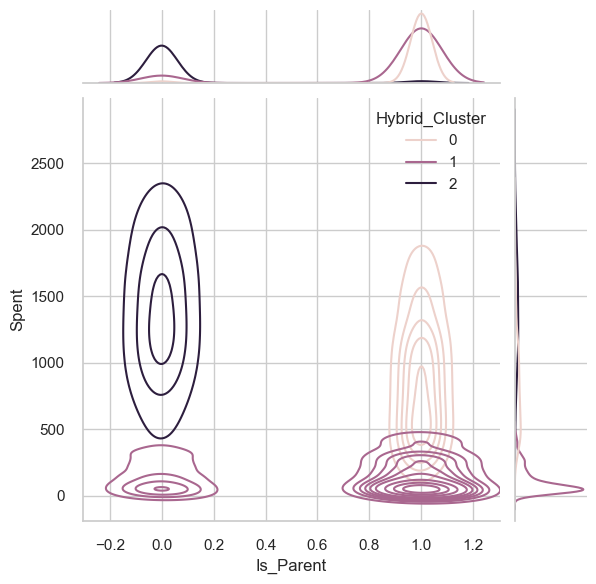

<Figure size 800x550 with 0 Axes>

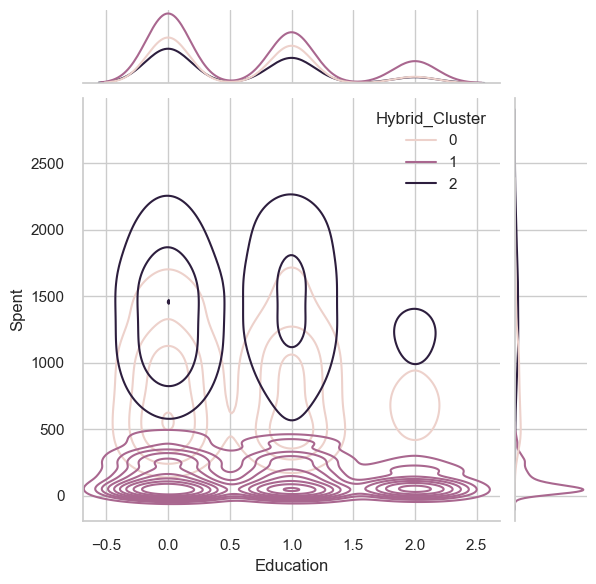

<Figure size 800x550 with 0 Axes>

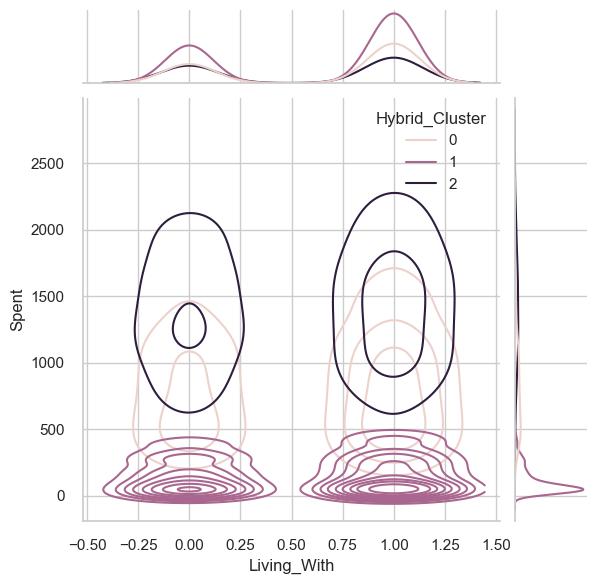

In [177]:
Personal = [ "Kidhome","Teenhome","Time_Enrolled_Days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=customerdata[i], y=customerdata["Spent"], hue =customerdata["Hybrid_Cluster"], kind="kde")
    plt.show()

# Model Building - Hybrid Clustering

In [178]:
X = customerdata.drop(columns=["Hybrid_Cluster"])
y = customerdata['Hybrid_Cluster']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize all classifiers with the same set of hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, clf in classifiers.items():
    print(f"\033[1mTraining {name}...\033[0m")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    if len(np.unique(y_test)) == 2:  # Binary classification
        if hasattr(clf, "decision_function"):
            y_decision = clf.decision_function(X_test)
        else:
            y_decision = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_decision)
        auc = roc_auc_score(y_test, y_decision)
        print("AUC:", auc)
    else:  # Multiclass classification
        y_proba = clf.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        
        print("AUC:", auc)
    cv_scores = cross_val_score(clf, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())
    print("--------------------------------------------------")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.87
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       136
           1       0.96      0.97      0.97       217
           2       0.77      0.76      0.76        94

    accuracy                           0.87       447
   macro avg       0.84      0.84      0.84       447
weighted avg       0.87      0.87      0.87       447

Confusion Matrix:
[[109   7  20]
 [  6 210   1]
 [ 22   1  71]]
AUC: 0.9647607514389787
Cross-Validation Scores: [0.87472036 0.84340045 0.867713   0.84977578 0.86995516]
Mean Cross-Validation Score: 0.8611129503114936
--------------------------------------------------
Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.79
Classification Report of Support Vector Machine:
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       136


Based on the performance metrics provided for each classifier, we can identify the best fit in a hybrid cluster approach by considering accuracy, AUC, and cross-validation scores. Here’s a summary of the results:

### Summary of Classifier Performance

1. **Logistic Regression**
   - Accuracy: 0.87
   - AUC: 0.9648
   - Mean Cross-Validation Score: 0.8611

2. **Support Vector Machine (SVM)**
   - Accuracy: 0.79
   - AUC: 0.9075
   - Mean Cross-Validation Score: 0.7814

3. **Random Forest**
   - Accuracy: 0.98
   - AUC: 0.9995
   - Mean Cross-Validation Score: 0.9848

4. **Gradient Boosting**
   - Accuracy: 0.99
   - AUC: 0.9989
   - Mean Cross-Validation Score: 0.9852

5. **K-Nearest Neighbors (KNN)**
   - Accuracy: 0.85
   - AUC: 0.9356
   - Mean Cross-Validation Score: 0.8580

6. **Naive Bayes**
   - Accuracy: 0.95
   - AUC: 0.9958
   - Mean Cross-Validation Score: 0.9552

7. **Decision Tree**
   - Accuracy: 0.98
   - AUC: 0.9817
   - Mean Cross-Validation Score: 0.9785

### Best Fit in Hybrid Cluster

When considering the best fit for a hybrid cluster, we should look for models that offer a balance of high accuracy, high AUC, and consistent performance across cross-validation.

1. **Gradient Boosting**:
   - **Accuracy**: 0.99 (highest among all models)
   - **AUC**: 0.9989 (very close to the highest)
   - **Mean Cross-Validation Score**: 0.9852 (highest among all models)
   - **Summary**: Gradient Boosting shows the highest accuracy and very high AUC, along with the highest mean cross-validation score, indicating it is the most robust model overall.

2. **Random Forest**:
   - **Accuracy**: 0.98
   - **AUC**: 0.9995 (highest among all models)
   - **Mean Cross-Validation Score**: 0.9848 (very close to the highest)
   - **Summary**: Random Forest also performs exceptionally well with the highest AUC and nearly the highest accuracy and cross-validation score, making it another strong candidate.

3. **Decision Tree**:
   - **Accuracy**: 0.98
   - **AUC**: 0.9817
   - **Mean Cross-Validation Score**: 0.9785
   - **Summary**: Decision Tree performs similarly to Random Forest but with slightly lower AUC and cross-validation score.

### Conclusion

The **Gradient Boosting** classifier is the best fit in a hybrid cluster approach due to its highest accuracy, very high AUC, and the highest mean cross-validation score, demonstrating robustness and reliability across different data splits. **Random Forest** is a very close second, with excellent performance metrics making it another suitable option. These models should be preferred for their overall effectiveness in providing high-quality clustering and classification performance.

# Hence we will deploy model using Gradient Boosting classifier as two clusters giving 0.99 accuracy .